<a href="https://colab.research.google.com/github/Ishakarn02/CODESOFT/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Dataset - https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [35]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 118MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sms-spam-collection-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sms=pd.read_csv("spam.csv", encoding="latin-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **DATA PREPROCESSING**

In [14]:
sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [15]:
sms.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [16]:
sms.shape

(5572, 5)

In [17]:
sms.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          v1     v2  Unnamed: 2  Unnamed: 3  Unnamed: 4
0     False  False        True        True        True
1     False  False        True        True        True
2     False  False        True        True        True
3     False  False        True        True        True
4     False  False        True        True        True
...     ...    ...         ...         ...         ...
5567  False  False        True        True        True
5568  False  False        True        True        True
5569  False  False        True        True        True
5570  False  False        True        True        True
5571  False  False        True        True        True

[5572 rows x 5 columns]>

In [18]:
sms=sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [19]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
sms.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool>

In [21]:
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## **EDA**

In [23]:
print("no of rows", len(sms))

no of rows 5572


In [24]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: ylabel='Frequency'>

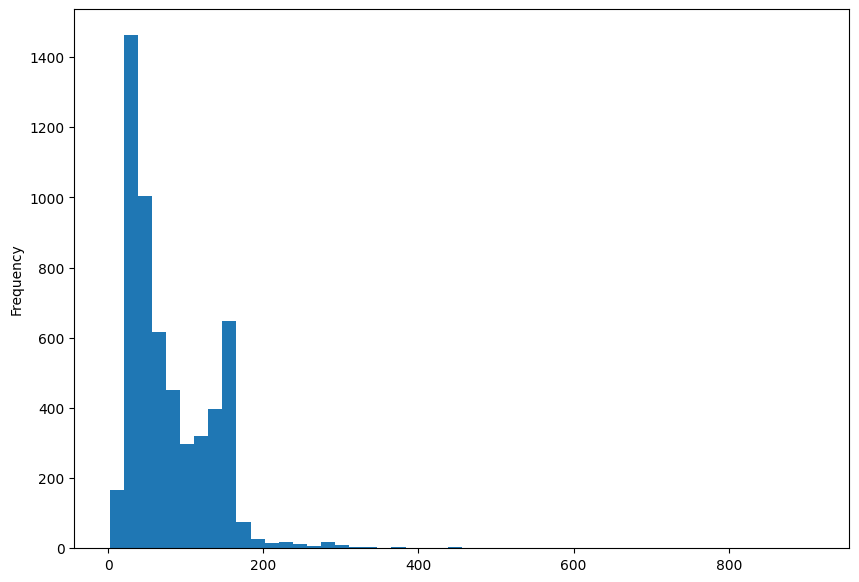

In [27]:
sms['length'].plot(bins=50, kind='hist',figsize=(10,7))

In [28]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

<ipython-input-28-2d476ed5f859>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


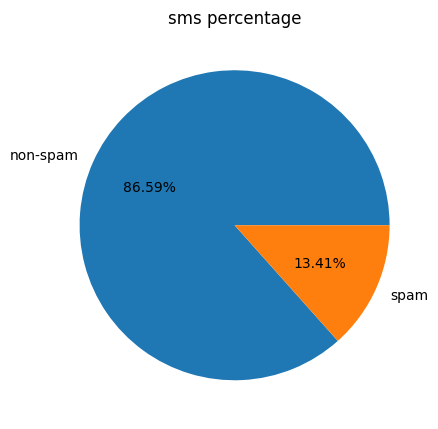

In [29]:
plt.figure(figsize=(5,6))
plt.pie(sms['label'].value_counts(),autopct='%1.2f%%',labels=['non-spam','spam'])
plt.title('sms percentage')
plt.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

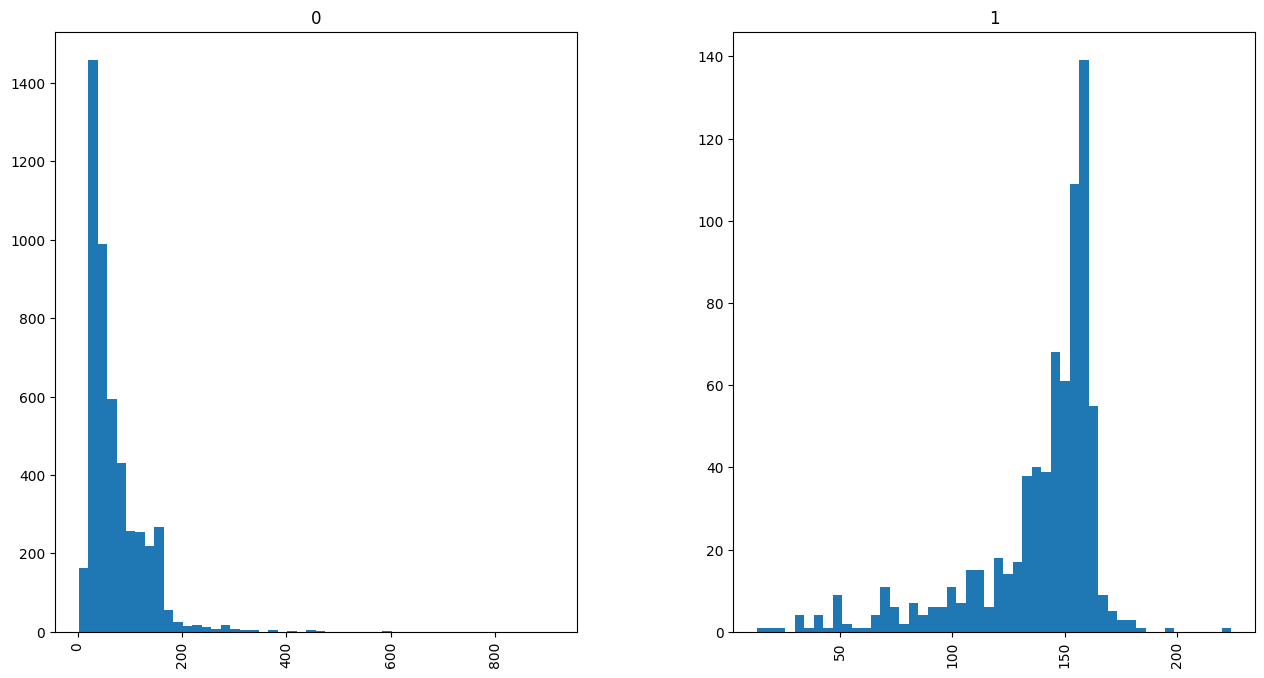

In [30]:
sms.hist(column='length', by='label', bins=50, figsize=(15,8))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count=CountVectorizer()
input=["REMINDER FROM 02: To get 2.50 pounds free call credit and details of great offers"]

text=count.fit_transform(sms['text'])


x_train, x_test, y_train, y_test= train_test_split(text, sms['label'], test_size=0.20, random_state=1 )
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [32]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


In [33]:
sms['length'].max()

910

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train, y_train)
